# Data Mining Lab 2
In this lab session we will focus on the use of Neural Word Embeddings 

## Table of Contents
1. Data preparation
2. Feature engineering
3. Model
4. Results evaluation
5. Other things you could try
6. Deep Learning
7. Word to Vector
8. Clustering
9. High-dimension Visualization



### Necessary Library Requirements:

#### Same as Lab1:
- [Jupyter](http://jupyter.org/) (Strongly recommended but not required)
    - Install via `pip3 install jupyter` and use `jupyter notebook` in terminal to run
- [Scikit Learn](http://scikit-learn.org/stable/index.html)
    - Install via `pip3 sklearn` from a terminal
- [Pandas](http://pandas.pydata.org/)
    - Install via `pip3 install pandas` from a terminal
- [Numpy](http://www.numpy.org/)
    - Install via `pip3 install numpy` from a terminal
- [Matplotlib](https://matplotlib.org/)
    - Install via `pip3 maplotlib` from a terminal
- [Plotly](https://plot.ly/)
    - Install via `pip3 install plotly` from a terminal
- [Seaborn](https://seaborn.pydata.org/)
    - Install and signup for `seaborn`
- [NLTK](http://www.nltk.org/)
    - Install via `pip3 install nltk` from a terminal

#### New Libraries to install:
- [Gensim](https://pypi.org/project/gensim/)
    - Install via `pip3 install gensim`

- [tensorflow](https://www.tensorflow.org/)
    - Install via `pip3 install tensorflow`
    - Also install `pip3 install tensorflow-hub`

- [Keras](https://keras.io/)
    - Install via `pip3 install keras`

---
## Introduction

**Dataset:** [SemEval 2017 Task](https://competitions.codalab.org/competitions/16380)

**Task:** Classify text data into 4 different emotions using word embedding and other deep information retrieval approaches.

![pic0](pics/pic0.png)

---
## 1. Data Preparation

Before beggining the lab, please make sure to download the [Google News Dataset](https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit) and place it in a folder named "GoogleNews" in the same directory as this file.

## 1.1 Load data

We start by loading the csv files into a single pandas dataframe for training and one for testing.

In [1]:
import pandas as pd

### training data
anger_train = pd.read_csv("data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

In [2]:
# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

In [3]:
### testing data
anger_test = pd.read_csv("data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
train_df.head()

,id,text,emotion,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


In [4]:
# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

In [5]:
print("Shape of Training df: ", train_df.shape)
print("Shape of Testing df: ", test_df.shape)

Shape of Training df:  (3613, 4)
Shape of Testing df:  (347, 4)


---
### ** >>> Exercise 1 (Take home): **  
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)


the: 1734
to: 1288
i: 1240
a: 1202
and: 953
of: 791
is: 785
you: 697
in: 622
my: 533
that: 482
it: 478
for: 445
on: 390
be: 380
me: 375
this: 342
im: 328
so: 325
have: 311
just: 299
not: 298
but: 289
with: 288
at: 269
its: 252
like: 239
are: 230
was: 229
your: 229


/tmp/ipykernel_3620293/2915817975.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Word', y='Frequency', data=top_words_df, palette="viridis")


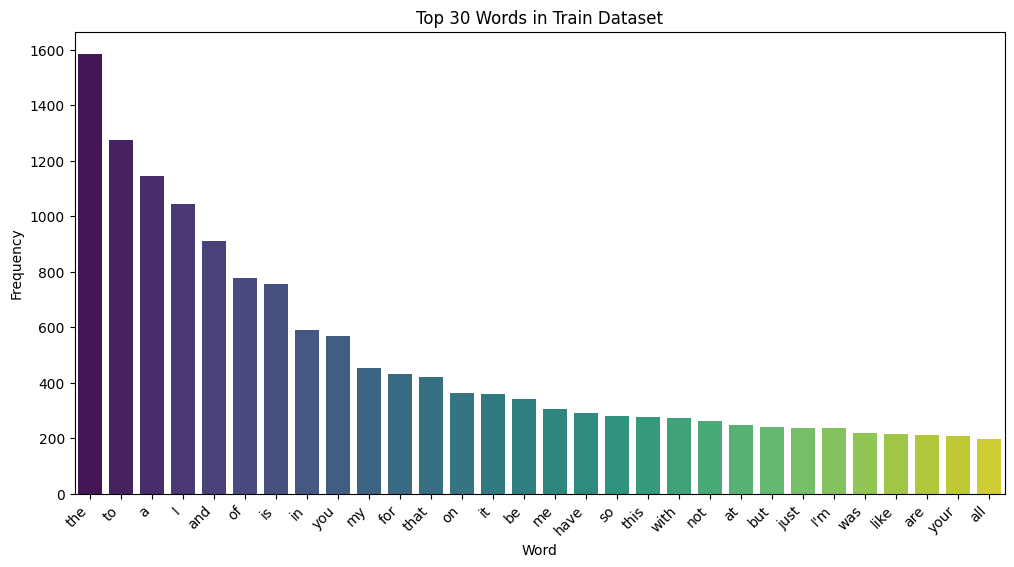

the: 152
i: 144
to: 138
a: 115
and: 92
of: 83
is: 77
you: 71
in: 68
it: 62
for: 57
my: 52
on: 46
that: 44
be: 38
me: 36
so: 35
was: 34
all: 31
have: 30
at: 29
just: 29
with: 29
are: 26
but: 26
get: 26
dont: 24
your: 24
up: 23
not: 23


/tmp/ipykernel_3620293/2915817975.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Word', y='Frequency', data=top_words_df, palette="viridis")


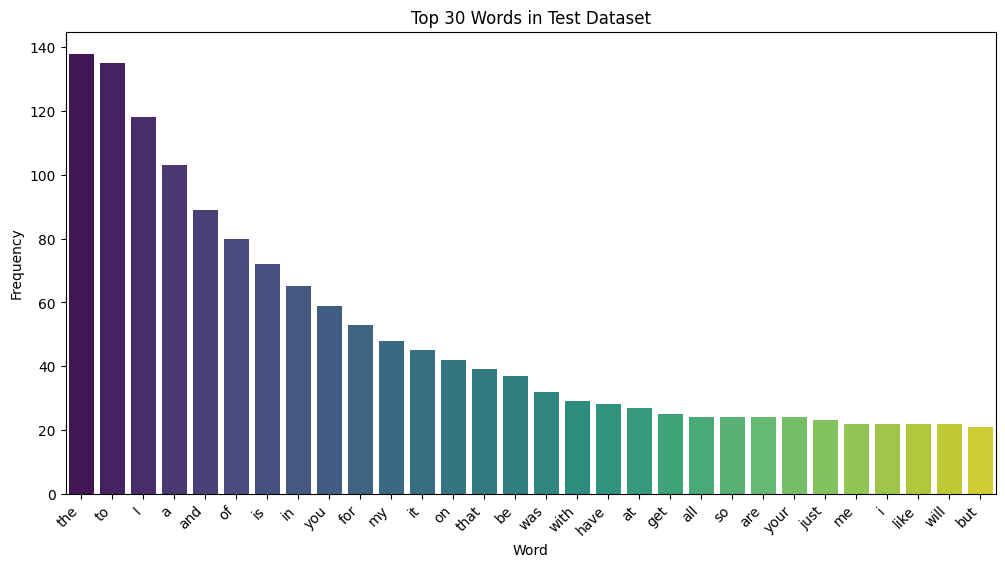

In [6]:
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
import re

# Function to plot word frequency
def plot_word_frequency(text_data, title):
    # Combine all text data into a single string
    all_text = ' '.join(text_data)
    
    # Tokenize the text into words
    words = all_text.split()
    
    # Calculate word frequency using Counter
    word_freq = Counter(words)
    
    # Get the top 30 words and their frequencies
    top_words = word_freq.most_common(30)
    top_words_df = pd.DataFrame(top_words, columns=['Word', 'Frequency'])
    
    # Plot the word frequency
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Word', y='Frequency', data=top_words_df, palette="viridis")
    plt.title(title)
    plt.xticks(rotation=45, ha='right')
    plt.show()

def preprocess_text(text):
    # Perform any necessary preprocessing on the text
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove non-alphabetic characters
    return text

def get_top_words(data_series, top_n=30):
    # Preprocess the entire dataset
    preprocessed_data = data_series.apply(preprocess_text)
    tokens = ' '.join(preprocessed_data).split()

    # Get the top N words
    word_counts = Counter(tokens)
    top_words = word_counts.most_common(top_n)

    return top_words

top_words_train = get_top_words(train_df['text'])
top_words_test = get_top_words(test_df['text'])

# Print and plot the top 30 words and their frequencies
for word, frequency in top_words_train:
    print(f'{word}: {frequency}')

plot_word_frequency(train_df['text'], 'Top 30 Words in Train Dataset')

for word, frequency in top_words_test:
    print(f'{word}: {frequency}')
plot_word_frequency(test_df['text'], 'Top 30 Words in Test Dataset')


---
### 1.2 Save data

We will save our data in Pickle format. The pickle module implements binary protocols for serializing and de-serializing a Python object structure.   
  
Some advantages for using pickle structure:  
* Because it stores the attribute type, it's more convenient for cross-platform use.  
* When your data is huge, it could use less space to store also consume less loading time.   

In [7]:
## save to pickle file
train_df.to_pickle("train_df.pkl") 
test_df.to_pickle("test_df.pkl")

In [8]:
import pandas as pd

## load a pickle file
train_df = pd.read_pickle("train_df.pkl")
test_df = pd.read_pickle("test_df.pkl")

For more information: https://reurl.cc/0Dzqx

---
### 1.3 Exploratory data analysis (EDA)

Again, before getting our hands dirty, we need to explore a little bit and understand the data we're dealing with.

In [9]:
# group to find distribution
train_df.groupby(['emotion']).count()['text']

emotion
anger       857
fear       1147
joy         823
sadness     786
Name: text, dtype: int64

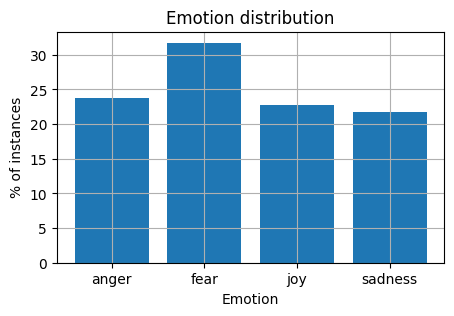

In [10]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# the histogram of the data
labels = train_df['emotion'].unique()
post_total = len(train_df)
df1 = train_df.groupby(['emotion']).count()['text']
df1 = df1.apply(lambda x: round(x*100/post_total,3))

#plot
fig, ax = plt.subplots(figsize=(5,3))
plt.bar(df1.index,df1.values)

#arrange
plt.ylabel('% of instances')
plt.xlabel('Emotion')
plt.title('Emotion distribution')
plt.grid(True)
plt.show()

---

## 2. Feature engineering
### Using Bag of Words
Using scikit-learn ```CountVectorizer``` perform word frequency and use these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

In [12]:
# build analyzers (bag-of-words)
BOW_vectorizer = CountVectorizer() 

In [13]:
# 1. Learn a vocabulary dictionary of all tokens in the raw documents.
BOW_vectorizer.fit(train_df['text'])

# 2. Transform documents to document-term matrix.
train_data_BOW_features = BOW_vectorizer.transform(train_df['text'])
test_data_BOW_features = BOW_vectorizer.transform(test_df['text'])

In [14]:
# check the result
train_data_BOW_features

<3613x10115 sparse matrix of type '<class 'numpy.int64'>'
	with 51467 stored elements in Compressed Sparse Row format>

In [15]:
type(train_data_BOW_features)

scipy.sparse._csr.csr_matrix

In [16]:
# add .toarray() to show
train_data_BOW_features.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [17]:
# check the dimension
train_data_BOW_features.shape

(3613, 10115)

In [18]:
# observe some feature names
feature_names = BOW_vectorizer.get_feature_names_out()
feature_names[100:110]

array(['2k17', '2much', '2nd', '30', '300', '301', '30am', '30pm', '30s',
       '31'], dtype=object)

The embedding is done. We can technically feed this into our model. However, depending on the embedding technique you use and your model, your accuracy might not be as high, because:

* curse of dimensionality  (we have 10,115 dimension now)
* some important features are ignored (for example, some models using emoticons yeld better performance than counterparts)

In [19]:
"😂" in feature_names

False

Let's try using another tokenizer below.

In [20]:
import nltk

# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
BOW_500.fit(train_df['text'])

train_data_BOW_features_500 = BOW_500.transform(train_df['text'])

## check dimension
train_data_BOW_features_500.shape

/home/yichiehqq/anaconda3/envs/DMlab/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(3613, 500)

In [21]:
train_data_BOW_features_500.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]])

In [22]:
# observe some feature names
feature_names_500 = BOW_500.get_feature_names_out()
feature_names_500[100:110]

array(['change', 'cheer', 'cheerful', 'cheerfully', 'cheering', 'cheery',
       'come', 'comes', 'could', 'country'], dtype=object)

In [23]:
"😂" in feature_names_500

True

---
### ** >>> Exercise 2 (Take home): **  
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [24]:
# Answer here


from sklearn.feature_extraction.text import TfidfVectorizer

# build TF-IDF vectorizer with 1000 features
TFIDF_vectorizer = TfidfVectorizer(max_features=1000) 

# 1. Learn a vocabulary dictionary of all tokens in the raw documents.
TFIDF_vectorizer.fit(train_df['text'])

# 2. Transform documents to document-term matrix.
train_data_TFIDF_features = TFIDF_vectorizer.transform(train_df['text'])
test_data_TFIDF_features = TFIDF_vectorizer.transform(test_df['text'])

# check the result
train_data_TFIDF_features

# check the type
type(train_data_TFIDF_features)

# add .toarray() to show
train_data_TFIDF_features.toarray()

# observe some feature names
feature_names_TFIDF = TFIDF_vectorizer.get_feature_names_out()
feature_names_TFIDF[100:110]


array(['bitter', 'black', 'blacks', 'blame', 'blessed', 'blood', 'bloody',
       'blues', 'body', 'boiling'], dtype=object)

---
## 3. Model
### 3.1 Decision Trees
Using scikit-learn ```DecisionTreeClassifier``` performs word frequency and uses these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

In [25]:
from sklearn.tree import DecisionTreeClassifier

# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## take a look at data dimension is a good habit  :)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [26]:
## build DecisionTree model
DT_model = DecisionTreeClassifier(random_state=1)

## training!
DT_model = DT_model.fit(X_train, y_train)

## predict!
y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)

## so we get the pred result
y_test_pred[:10]

array(['sadness', 'fear', 'fear', 'anger', 'fear', 'sadness', 'anger',
       'sadness', 'fear', 'anger'], dtype=object)

---
## 4. Results Evaluation

Now we will check the results of our model's performance

In [27]:
## accuracy
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))


training accuracy: 0.99
testing accuracy: 0.68


In [28]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

       anger       0.66      0.68      0.67        84
        fear       0.66      0.69      0.67       110
         joy       0.72      0.71      0.71        79
     sadness       0.70      0.64      0.67        74

    accuracy                           0.68       347
   macro avg       0.68      0.68      0.68       347
weighted avg       0.68      0.68      0.68       347



In [29]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred) 
print(cm)

[[57 18  6  3]
 [16 76  9  9]
 [ 6  9 56  8]
 [ 7 13  7 47]]


In [30]:
# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'True label',
           ylabel = 'Predicted label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

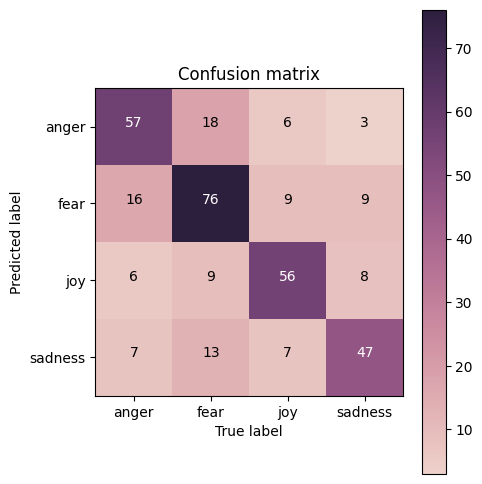

In [31]:
# plot your confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

---
### ** >>> Exercise 3 (Take home): **  
Can you interpret the results above? What do they mean?

### answer here

### Interpretation:

1. The diagonal entries (top-left to bottom-right) represent the number of correctly predicted instances for each class.
2. Off-diagonal entries represent misclassifications.
3. The model generally performs well, as the diagonal entries have higher values compared to off-diagonal entries.
4. The confusion matrix provides a detailed breakdown of the model's performance for each emotion class. If there are specific metrics you are interested in (precision, recall, F1-score), we can calculate them using the values from the confusion matrix.

### Angry:

1. True Positives (TP): 57 instances of 'Angry' were correctly predicted as 'Angry.'
2. False Positives (FP): 16 instances of 'Fear' were incorrectly predicted as 'Angry.' Also, 6 instances of 'Joy' and 7 instances of 'Sadness' were incorrectly predicted as 'Angry.'
3. False Negatives (FN): 18 instances of 'Angry' were incorrectly predicted as 'Fear.' Also, 6 instances of 'Angry' were incorrectly predicted as 'Joy,' and 3 instances of 'Angry' were incorrectly predicted as 'Sadness.'
4. True Negatives (TN): The sum of all other instances not involving 'Angry.'
### Fear:

1. True Positives (TP): 76 instances of 'Fear' were correctly predicted as 'Fear.'
2. False Positives (FP): 18 instances of 'Angry' were incorrectly predicted as 'Fear.' Also, 9 instances of 'Joy' and 13 instances of 'Sadness' were incorrectly predicted as 'Fear.'
3. False Negatives (FN): 16 instances of 'Fear' were incorrectly predicted as 'Angry.' Also, 9 instances of 'Fear' were incorrectly predicted as 'Joy,' and 9 instances of 'Fear' were incorrectly predicted as 'Sadness.'
4. True Negatives (TN): The sum of all other instances not involving 'Fear.'
### Joy:

1. True Positives (TP): 56 instances of 'Joy' were correctly predicted as 'Joy.'
2. False Positives (FP): 6 instances of 'Angry' were incorrectly predicted as 'Joy.' Also, 9 instances of 'Fear' and 7 instances of 'Sadness' were incorrectly predicted as 'Joy.'
3. False Negatives (FN): 6 instances of 'Joy' were incorrectly predicted as 'Angry.' Also, 9 instances of 'Joy' were incorrectly predicted as 'Fear,' and 8 instances of 'Joy' were incorrectly predicted as 'Sadness.'
4. True Negatives (TN): The sum of all other instances not involving 'Joy.'
### Sadness:

1. True Positives (TP): 47 instances of 'Sadness' were correctly predicted as 'Sadness.'
2. False Positives (FP): 3 instances of 'Angry' were incorrectly predicted as 'Sadness.' Also, 9 instances of 'Fear' and 8 instances of 'Joy' were incorrectly predicted as 'Sadness.'
3. False Negatives (FN): 7 instances of 'Sadness' were incorrectly predicted as 'Angry.' Also, 13 instances of 'Sadness' were incorrectly predicted as 'Fear,' and 7 instances of 'Sadness' were incorrectly predicted as 'Joy.'
4. True Negatives (TN): The sum of all other instances not involving 'Sadness.'

Based on the confusion matrix you provided, we can calculate precision, recall, and F1-score for each class (Angry, Fear, Joy, Sadness). These metrics are commonly used in classification evaluation:

Precision (Positive Predictive Value): The proportion of instances predicted as positive (Angry, Fear, Joy, Sadness) that are actually positive.

Precision = TP / (TP + FP)
Recall (Sensitivity or True Positive Rate): The proportion of actual positive instances that were correctly predicted by the model.

Recall = TP / (TP + FN)
F1-Score: The harmonic mean of precision and recall. It provides a balance between precision and recall.

F1-Score = 2 * (Precision * Recall) / (Precision + Recall)

|           | Precision | Recall | F1-Score |
|-----------|-----------|--------|----------|
| Angry     |   0.62    |  0.57  |   0.60   |
| Fear      |   0.68    |  0.76  |   0.72   |
| Joy       |   0.73    |  0.56  |   0.63   |
| Sadness   |   0.72    |  0.63  |   0.67   |

---
### ** >>> Exercise 4 (Take home): **  
Build a model using a ```Naive Bayes``` model and train it. What are the testing results? 

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

/home/yichiehqq/anaconda3/envs/DMlab/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Testing Accuracy (Naive Bayes): 0.7

Classification Report (Naive Bayes):
               precision    recall  f1-score   support

       anger       0.63      0.65      0.64        84
        fear       0.73      0.77      0.75       110
         joy       0.78      0.71      0.74        79
     sadness       0.64      0.62      0.63        74

    accuracy                           0.70       347
   macro avg       0.70      0.69      0.69       347
weighted avg       0.70      0.70      0.70       347



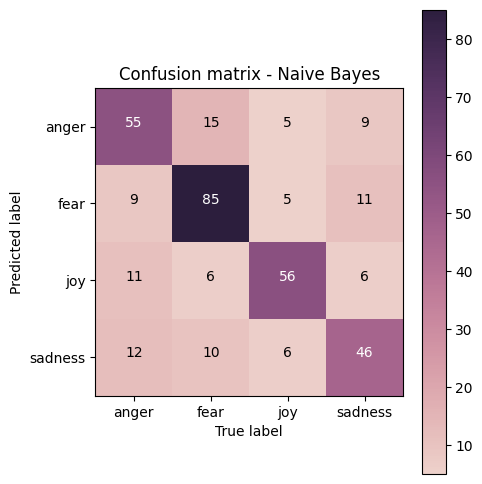

In [32]:
# Answer here
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Build analyzers (bag-of-words)
BOW_vectorizer = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 
BOW_vectorizer.fit(train_df['text'])


X_train_naive_bayes = BOW_vectorizer.transform(train_df['text'])
X_test_naive_bayes = BOW_vectorizer.transform(test_df['text'])
y_train_naive_bayes = train_df['emotion']
y_test_naive_bayes = test_df['emotion']

# Build & Train Naive Bayes model
naive_bayes_model = MultinomialNB()
naive_bayes_model.fit(X_train_naive_bayes, y_train_naive_bayes)

# test 
y_test_pred_naive_bayes = naive_bayes_model.predict(X_test_naive_bayes)

# Accuracy
acc_test_naive_bayes = accuracy_score(y_true=y_test_naive_bayes, y_pred=y_test_pred_naive_bayes)

# Classification report
print("Testing Accuracy (Naive Bayes):", round(acc_test_naive_bayes, 2))
print("\nClassification Report (Naive Bayes):\n", classification_report(y_true=y_test_naive_bayes, y_pred=y_test_pred_naive_bayes))

# Confusion matrix
cm_naive_bayes = confusion_matrix(y_true=y_test_naive_bayes, y_pred=y_test_pred_naive_bayes)
plot_confusion_matrix(cm_naive_bayes, classes=my_tags, title='Confusion matrix - Naive Bayes')

---
### ** >>> Exercise 5 (Take home): **  

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

###  Answer here
### Observations:
1. Accuracy:
    * The Naive Bayes model outperforms the Decision Tree model in terms of accuracy (0.70 vs. 0.62). The NB model has a higher overall correct prediction rate on the test set.
2. Precision, Recall, and F1-score:
    * In general, the Naive Bayes model shows better precision, recall, and F1-score (weighted average) compared to the Decision Tree model.
    * Precision, recall, and F1-score are higher for the Naive Bayes model for each emotion class ('anger,' 'fear,' 'joy,' 'sadness').

### Explainations

1. Model Complexity:
    * Decision Trees can be prone to overfitting, especially if the tree becomes too deep and captures noise in the training data. This might result in suboptimal generalization to the test set.
    * Naive Bayes, on the other hand, is based on the assumption of independence between features, and its simplicity can lead to better generalization in certain cases.
2. Data Distribution:
    * Naive Bayes is well-suited for text classification tasks and often performs well when dealing with sparse and high-dimensional data, such as text data represented by the Bag-of-Words model.
    * Decision Trees might struggle with high-dimensional data and can be sensitive to variations in the training data.
3. Assumptions:
    * Naive Bayes assumes independence between features given the class, which might not be realistic in all cases. However, this assumption can work well for certain types of data, especially text data.
    * Decision Trees make decisions based on feature splits, and the quality of these splits is crucial. If the splits are not capturing relevant patterns, the performance may suffer.

In summary, the Naive Bayes model appears to be more effective for this text classification task, possibly due to its suitability for high-dimensional and sparse data, as well as its simplicity and independence assumption, which align well with the characteristics of text data. The Decision Tree model might benefit from hyperparameter tuning, feature engineering, or the use of ensemble methods to improve its performance.

---

## 5. Other things you can try

Thus, there are several things you can try that will affect your results. In order to yield better results, you can experiment by: 
- Trying different features (Feature engineering)e.g Word2Vec, PCA, LDA, FastText, Clustering
- Trying different models
- Analyzing your results and interpret them to improve your feature engineering/model building process
- Iterate through the steps above until finding a satisfying result

Remember that you should also consider the task at hand and the model you'll feed the data to. 

---
## 6. Deep Learning

We use [Keras](https://keras.io/) to be our deep learning framwork, and follow the [Model (functional API)](https://keras.io/models/model/) to build a Deep Neural Network (DNN) model. Keras runs with Tensorflow in the backend. It's a nice abstraction to start working with NN models. 

Because Deep Learning is a 1-semester course, we can't talk about each detail about it in the lab session. Here, we only provide a simple template about how to build & run a DL model successfully. You can follow this template to design your model.

We will begin by building a fully connected network, which looks like this:

![Fully Connected Network](pics/pic1.png)

(source: https://github.com/drewnoff/spark-notebook-ml-labs/tree/master/labs/DLFramework)


### 6.1 Prepare data (X, y)

In [33]:
import keras

# standardize name (X, y) 
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## check dimension is a good habbit 
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

2023-12-31 14:52:45.613933: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-31 14:52:45.613961: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-31 14:52:45.614758: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-31 14:52:45.618955: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-31 14:52:46.161571: W tensorflow/compiler/tf2

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


### 6.2 Deal with categorical label (y)

Rather than put your label `train_df['emotion']` directly into a model, we have to process these categorical (or say nominal) label by ourselves. 

Here, we use the basic method [one-hot encoding](https://en.wikipedia.org/wiki/One-hot) to transform our categorical  labels to numerical ones.


In [34]:
## deal with label (string -> one-hot)

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train)
print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

print('\n\n## After convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)


check label:  ['anger' 'fear' 'joy' 'sadness']

## Before convert
y_train[0:4]:
 830     anger
737     anger
1408     fear
707     anger
Name: emotion, dtype: object

y_train.shape:  (3613,)
y_test.shape:  (347,)


## After convert
y_train[0:4]:
 [[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]]

y_train.shape:  (3613, 4)
y_test.shape:  (347, 4)


### 6.3 Build model

In [35]:
# I/O check
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  500
output_shape:  4


![Imgur](pics/pic2.png)

In [36]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 500)]             0         
                                                                 
 dense (Dense)               (None, 64)                32064     
                                                                 
 re_lu (ReLU)                (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 re_lu_1 (ReLU)              (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 4)                 260       
                                                                 
 softmax (Softmax)           (None, 4)                 0     

2023-12-31 14:52:46.964183: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-12-31 14:52:46.964348: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-12-31 14:52:46.984586: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

### 6.4 Train

In [37]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('logs/training_log.csv')

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[csv_logger],
                    validation_data = (X_test, y_test))
print('training finish')

Epoch 1/25


2023-12-31 14:52:47.799568: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-12-31 14:52:47.893387: I external/local_xla/xla/service/service.cc:168] XLA service 0x7fb9d06b4f50 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-12-31 14:52:47.893418: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 4090, Compute Capability 8.9
2023-12-31 14:52:47.893427: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (1): NVIDIA GeForce RTX 4090, Compute Capability 8.9
2023-12-31 14:52:47.898870: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-12-31 14:52:47.913481: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8902
I0000 00:00:1704034367.972094 3620467 device_comp

113/113 [==============================] - 7s 52ms/step - loss: 1.3418 - accuracy: 0.3355 - val_loss: 1.2978 - val_accuracy: 0.4726
Epoch 2/25
113/113 [==============================] - 3s 24ms/step - loss: 1.0412 - accuracy: 0.6277 - val_loss: 0.9575 - val_accuracy: 0.6369
Epoch 3/25
113/113 [==============================] - 2s 21ms/step - loss: 0.6064 - accuracy: 0.7927 - val_loss: 0.7614 - val_accuracy: 0.7089
Epoch 4/25
113/113 [==============================] - 2s 16ms/step - loss: 0.4237 - accuracy: 0.8508 - val_loss: 0.8083 - val_accuracy: 0.6830
Epoch 5/25
113/113 [==============================] - 2s 16ms/step - loss: 0.3349 - accuracy: 0.8821 - val_loss: 0.8298 - val_accuracy: 0.7032
Epoch 6/25
113/113 [==============================] - 2s 16ms/step - loss: 0.2682 - accuracy: 0.9087 - val_loss: 0.8938 - val_accuracy: 0.6945
Epoch 7/25
113/113 [==============================] - 2s 15ms/step - loss: 0.2222 - accuracy: 0.9272 - val_loss: 0.9481 - val_accuracy: 0.7118
Epoch 8/25

### 6.5 Predict on testing data

In [38]:
## predict
pred_result = model.predict(X_test, batch_size=128)
pred_result[:5]

1/3 [=========>....................] - ETA: 0s

3/3 [==============================] - 0s 13ms/step


array([[7.6508135e-02, 1.2483047e-02, 6.0044043e-04, 9.1040832e-01],
       [5.3174531e-10, 1.0000000e+00, 2.3388227e-11, 7.6594946e-11],
       [1.4115312e-02, 3.8926658e-01, 2.5292778e-02, 5.7132536e-01],
       [2.1539540e-03, 1.4711140e-06, 1.2356466e-05, 9.9783224e-01],
       [9.9989653e-01, 7.9660320e-05, 2.5050160e-06, 2.1388045e-05]],
      dtype=float32)

In [39]:
pred_result = label_decode(label_encoder, pred_result)
pred_result[:5]

array(['sadness', 'fear', 'sadness', 'sadness', 'anger'], dtype=object)

In [40]:
from sklearn.metrics import accuracy_score

print('testing accuracy: {}'.format(round(accuracy_score(label_decode(label_encoder, y_test), pred_result), 2)))

testing accuracy: 0.69


In [41]:
#Let's take a look at the training log
training_log = pd.DataFrame()
training_log = pd.read_csv("logs/training_log.csv")
training_log

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.335455,1.341773,0.472622,1.297751
1,1,0.627733,1.041184,0.636888,0.957529
2,2,0.792693,0.606387,0.708934,0.761365
3,3,0.850816,0.423668,0.682997,0.808298
4,4,0.882092,0.334945,0.703170,0.829776
5,5,0.908663,0.268212,0.694524,0.893825
6,6,0.927207,0.222246,0.711816,0.948075
7,7,0.941046,0.186333,0.703170,0.999630
8,8,0.950457,0.153349,0.697406,1.078744
9,9,0.959867,0.140614,0.691643,1.150394


---
### ** >>> Exercise 6 (Take home): **  

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below.(Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?
<table><tr>
    <td><img src="pics/pic3.png" style="width: 300px;"/> </td>
    <td><img src="pics/pic4.png" style="width: 300px;"/> </td>
</tr></table>

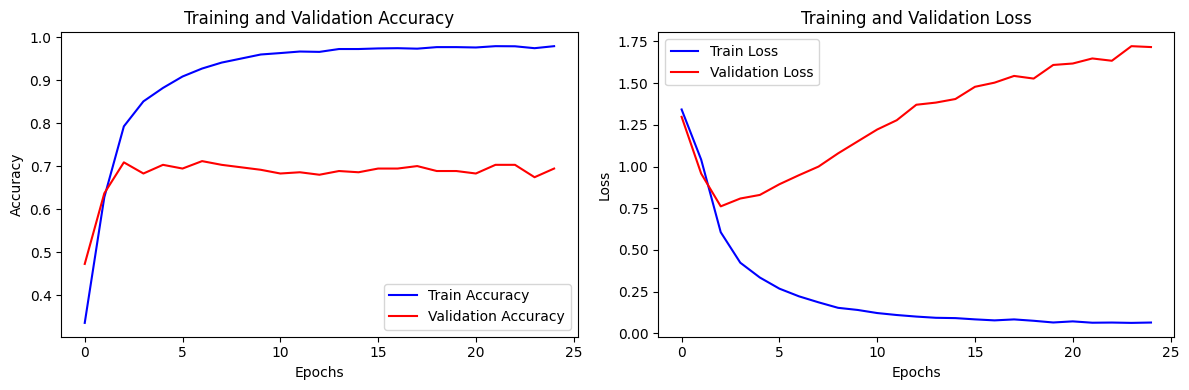

In [42]:
import matplotlib.pyplot as plt

# Plotting training and validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)

plt.plot(history.history['accuracy'], label='Train Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting training and validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


### Answer here

### Observation of the figures:
### Training Accuracy and Validation Accuracy:

The training accuracy is increasing while the validation accuracy is plateaus after 2/3 epochs in figure 1, it suggests overfitting.

### Training Loss and Validation Loss:

The training loss is decreasing while the validation loss is decreasing then starts to increase after 2/3 epochs, it indicates overfitting. 

In summary, the model is fitting the training data too closely and might not generalize well to new data.

### Interpret the Graphs:
* Ideal Scenario: In an ideal scenario, both training and validation accuracy increase, and both training and validation loss decrease. This indicates that the model is learning the underlying patterns in the data and generalizing well to new samples.

* Overfitting: If training accuracy continues to increase while validation accuracy plateaus or decreases, and training loss decreases while validation loss increases, the model is likely overfitting. Consider regularization techniques or reducing model complexity.

* Underfitting: If both training and validation accuracy remain low, and training and validation loss do not decrease significantly, the model may be underfitting. Consider increasing model complexity or using more advanced architectures.

---

### Note

If you don't have a GPU (level is higher than GTX 1060) or you are not good at setting lots of things about computer, we recommend you to use the [kaggle kernel](https://www.kaggle.com/kernels) to do deep learning model training. They have already installed all the librarys and provided free GPU for you to use.

Note however that you will only be able to run a kernel for 6 hours. After 6 hours of inactivity, your Kaggle kernel will shut down (meaning if your model takes more than 6 hours to train, you can't train it at once).


### More Information for your reference

* Keras document: https://keras.io/
* Keras GitHub example: https://github.com/keras-team/keras/tree/master/examples
* CS229: Machine Learning: http://cs229.stanford.edu/syllabus.html
* Deep Learning cheatsheet: https://stanford.edu/~shervine/teaching/cs-229/cheatsheet-deep-learning
* If you want to try TensorFlow or PyTorch: https://pytorch.org/tutorials/
https://www.tensorflow.org/tutorials/quickstart/beginner

---
## 7. Word2Vector

We will introduce how to use `gensim` to train your word2vec model and how to load a pre-trained model.

https://radimrehurek.com/gensim/index.html

### 7.1 Prepare training corpus

In [43]:
## check library
import gensim

## ignore warnings
import warnings
warnings.filterwarnings('ignore')

# # if you want to see the training messages, you can use it
# import logging
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

## the input type
train_df['text_tokenized'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x))
train_df[['id', 'text', 'text_tokenized']].head()

,id,text,text_tokenized
830,10830,@Ms_HeartAttack peanut butter takes away the s...,"[@, Ms_HeartAttack, peanut, butter, takes, awa..."
737,10737,Lot 100 would give Ghandi road rage,"[Lot, 100, would, give, Ghandi, road, rage]"
1408,20551,@WTFISaHashtag1 @MuslimIQ The problem is that ...,"[@, WTFISaHashtag1, @, MuslimIQ, The, problem,..."
707,10707,@l1ght__eyes u tried boiling em takes years too,"[@, l1ght__eyes, u, tried, boiling, em, takes,..."
1263,20406,Next month we'll be running overcoming #lowmoo...,"[Next, month, we, 'll, be, running, overcoming..."


In [44]:
## create the training corpus
training_corpus = train_df['text_tokenized'].values
training_corpus[:3]

array([list(['@', 'Ms_HeartAttack', 'peanut', 'butter', 'takes', 'away', 'the', 'sting']),
       list(['Lot', '100', 'would', 'give', 'Ghandi', 'road', 'rage']),
       list(['@', 'WTFISaHashtag1', '@', 'MuslimIQ', 'The', 'problem', 'is', 'that', 'right', 'wing', 'extremist', 'terror', 'groups', 'are', "n't", 'given', 'coverage', ',', 'press', 'not', 'interested'])],
      dtype=object)

### 7.2 Training our model

You can try to train your own model. More details: https://radimrehurek.com/gensim/models/word2vec.html

In [45]:
from gensim.models import Word2Vec

## setting
vector_dim = 100
window_size = 5
min_count = 1
training_epochs = 20

## model
word2vec_model = Word2Vec(sentences=training_corpus, 
                          vector_size=vector_dim, window=window_size, 
                          min_count=min_count, epochs=training_epochs)

![Imgur](https://i.imgur.com/Fca3MCs.png)

### 7.3 Generating word vector (embeddings)

In [46]:
# get the corresponding vector of a word
word_vec = word2vec_model.wv['happy']
word_vec

array([ 7.47938216e-01,  7.19585001e-01,  7.56022930e-02,  3.46076638e-01,
        1.29468646e-02, -9.51393783e-01,  8.16897094e-01,  1.23788798e+00,
       -6.81073427e-01, -3.39331806e-01, -2.18073517e-01, -8.33761930e-01,
       -5.56671441e-01,  4.70394790e-01, -2.44719107e-02, -2.29541436e-01,
        3.84201318e-01, -1.60434380e-01, -4.05959040e-02, -1.19989443e+00,
        5.20278335e-01,  6.32452726e-01,  4.85629439e-01,  1.48076355e-01,
        3.64667952e-01,  9.39844772e-02, -6.61197484e-01,  4.89158303e-01,
       -6.07187092e-01,  4.97420169e-02,  1.86737955e-01,  1.54754430e-01,
        5.16082704e-01, -6.51627600e-01, -1.87429860e-01,  4.26520675e-01,
        2.63196439e-01,  1.21604905e-01, -4.89300042e-01, -5.74318111e-01,
       -2.33533323e-01, -2.86658257e-01, -3.29651058e-01,  7.48585239e-02,
        4.64935720e-01, -3.06826085e-01, -1.05047703e+00,  4.38735396e-01,
        6.16460264e-01,  6.48809433e-01, -1.89711481e-01, -1.15289271e+00,
       -1.28505602e-01, -

In [47]:
# Get the most similar words
word = 'happy'
topn = 10
word2vec_model.wv.most_similar(word, topn=topn)

[('Be', 0.9240926504135132),
 ('Makes', 0.9207745790481567),
 ('free', 0.9175852537155151),
 ('help', 0.9157912135124207),
 ('plz', 0.9108610153198242),
 ("'you", 0.9090445041656494),
 ('smile', 0.9059602618217468),
 ('birthday', 0.9045515656471252),
 ('blessed', 0.903230607509613),
 ('successful', 0.9013396501541138)]

### 7.4 Using a pre-trained w2v model

Instead of training your own model ,you can use a model that has already been trained. Here, we see 2 ways of doing that:


#### (1) Download model by yourself

source: [GoogleNews-vectors-negative300](https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/view?resourcekey=0-wjGZdNAUop6WykTtMip30g)

more details: https://radimrehurek.com/gensim/models/keyedvectors.html

In [48]:
from gensim.models import KeyedVectors

## Note: this model is very huge, this will take some time ...
model_path = "GoogleNews-vectors-negative300.bin.gz"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')

w2v_google_model.most_similar('happy', topn=10)

load ok


[('glad', 0.7408890724182129),
 ('pleased', 0.6632170677185059),
 ('ecstatic', 0.6626912355422974),
 ('overjoyed', 0.6599286794662476),
 ('thrilled', 0.6514049172401428),
 ('satisfied', 0.6437949538230896),
 ('proud', 0.636042058467865),
 ('delighted', 0.627237856388092),
 ('disappointed', 0.6269949674606323),
 ('excited', 0.6247665286064148)]

#### (2) Using gensim api

Other pretrained models are available here: https://github.com/RaRe-Technologies/gensim-data

In [49]:
import gensim.downloader as api

## If you see `SSL: CERTIFICATE_VERIFY_FAILED` error, use this:
import ssl
import urllib.request
ssl._create_default_https_context = ssl._create_unverified_context

glove_twitter_25_model = api.load("glove-twitter-25")
print('load ok')

glove_twitter_25_model.most_similar('happy', topn=10)

load ok


[('birthday', 0.9577818512916565),
 ('thank', 0.937666654586792),
 ('welcome', 0.93361496925354),
 ('love', 0.9176183342933655),
 ('miss', 0.9164500832557678),
 ('hello', 0.9158351421356201),
 ('thanks', 0.915008544921875),
 ('merry', 0.9053249359130859),
 ('bless', 0.902732253074646),
 ('wish', 0.9013164043426514)]

### 7.5 king + woman - man = ?

Let's run one of the most famous examples for Word2Vec and compute the similarity between these 3 words:

In [50]:
w2v_google_model.most_similar(positive=['king', 'woman'], negative=['man'])

[('queen', 0.7118193507194519),
 ('monarch', 0.6189674139022827),
 ('princess', 0.5902431011199951),
 ('crown_prince', 0.5499460697174072),
 ('prince', 0.5377321839332581),
 ('kings', 0.5236844420433044),
 ('Queen_Consort', 0.5235945582389832),
 ('queens', 0.5181134343147278),
 ('sultan', 0.5098593831062317),
 ('monarchy', 0.5087411999702454)]

---
### ** >>> Exercise 7 (Take home): **  

Now, we have the word vectors, but our input data is a sequence of words (or say sentence). 
How can we utilize these "word" vectors to represent the sentence data and train our model?


In [51]:
# Answer here

# "we can apply the average word vector is a method for representing a sentence or a document by computing the average
# of the word vectors for all the words in that sentence. Each word in the sentence is associated with a word vector 
# (a numerical representation of the word's meaning in a multi-dimensional space). By taking the average of these word 
#  vectors, you obtain a single vector that represents the overall meaning of the sentence."

import numpy as np

def average_word_vectors(words, model, num_features):
    feature_vector = np.zeros((num_features,), dtype="float32")
    nwords = 0

    for word in words:
        if word in model.wv.index_to_key:
            nwords += 1
            feature_vector = np.add(feature_vector, model.wv[word])

    if nwords > 0:
        feature_vector = np.divide(feature_vector, nwords)

    return feature_vector

train_df['sentence_vector'] = train_df['text_tokenized'].apply(lambda x: average_word_vectors(x, word2vec_model, vector_dim))


### 8. Clustering: k-means

Here we introduce how to use `sklearn` to do the basic **unsupervised learning** approach, k-means.    

more details: http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html


#### Basic concept

![Image](https://i.imgur.com/PEdUf54.png)

(img source: https://towardsdatascience.com/k-means-clustering-identifying-f-r-i-e-n-d-s-in-the-world-of-strangers-695537505d)

In [52]:
# clustering target
target_list = ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']
print('target words: ', target_list)

# convert to word vector
X = [word2vec_model.wv[word] for word in target_list]

target words:  ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']


In [53]:
from sklearn.cluster import KMeans

# we have to decide how many cluster (k) we want
k = 2

# k-means model
kmeans_model = KMeans(n_clusters=k)
kmeans_model.fit(X)

# cluster result
cluster_result = kmeans_model.labels_

# show
for i in range(len(target_list)):
    print('word: {} \t cluster: {}'.format(target_list[i], cluster_result[i]))

word: happy 	 cluster: 1
word: fear 	 cluster: 1
word: angry 	 cluster: 1
word: car 	 cluster: 0
word: teacher 	 cluster: 0
word: computer 	 cluster: 0


![Imgur](pics/pic6.png)

In [54]:
#check cluster membership
word = 'student'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])

array([0], dtype=int32)

In [55]:
#check cluster membership
word = 'sad'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])

array([1], dtype=int32)


## 9. High-dimension Visualization: t-SNE

No matter if you use the Bag-of-words, TF-IDF, or Word2Vec, it's very hard to see the embedding result, because the dimension is larger than 3.  

In Lab 1, we already talked about PCA. We can use PCA to reduce the dimension of our data, then visualize it. However, if you dig deeper into the result, you'd find it is insufficient.

Our aim will be to create a visualization similar to the one below:

![Image](pics/pic7.png)
source: https://www.fabian-keller.de/research/high-dimensional-data-visualization 

Here we would like to introduce another visualization method called t-SNE.  
http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html 

### 9.1 Prepare visualizing target

Let's prepare data lists like:
- happy words
- angry words
- data words
- mining words

In [56]:
word_list = ['happy', 'angry', 'data', 'mining']

topn = 5
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]        
data_words = ['data'] + [word_ for word_, sim_ in w2v_google_model.most_similar('data', topn=topn)]        
mining_words = ['mining'] + [word_ for word_, sim_ in w2v_google_model.most_similar('mining', topn=topn)]        

print('happy_words: ', happy_words)
print('angry_words: ', angry_words)
print('data_words: ', data_words)
print('mining_words: ', mining_words)

target_words = happy_words + angry_words + data_words + mining_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled']
angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed']
data_words:  ['data', 'Data', 'datasets', 'dataset', 'databases', 'statistics']
mining_words:  ['mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

target words: 
['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'data', 'Data', 'datasets', 'dataset', 'databases', 'statistics', 'mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

color list:
['b', 'b', 'b', 'b', 'b', 'b', 'g', 'g', 'g', 'g', 'g', 'g', 'r', 'r', 'r', 'r', 'r', 'r', 'y', 'y', 'y', 'y', 'y', 'y']


### 9.2 Plot using t-SNE (2-dimension)

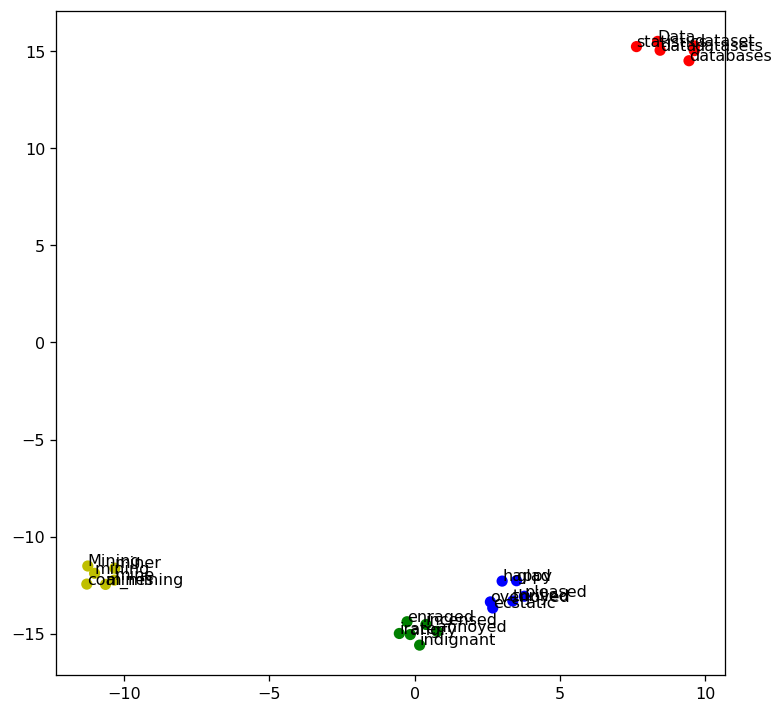

In [57]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=2)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

---
### ** >>> Exercise 8 (Take home): **  

Generate a t-SNE visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total).

Target Words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Said_Hirschbeck', 'elated', 'thankful', 'unhappy', 'angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'agitated', 'frustrated', 'furious', 'unhappy', 'outraged', 'livid', 'irritated', 'exasperated', 'angrier', 'Angry', 'sad', 'saddening', 'Sad', 'saddened', 'heartbreaking', 'disheartening', 'Meny_Friedman', 'parishioner_Pat_Patello', 'saddens_me', 'distressing', 'reminders_bobbing', 'Turkoman_Shiites', 'saddest', 'unfortunate', 'sorry', 'bittersweet', 'fear', 'fearful', 'fears', 'Fear', 'fearing', 'worry', 'dread', 'feared', 'anxiety', 'apprehension', 'afraid', 'worries', 'concern', 'distrust', 'worried', 'Fearful']


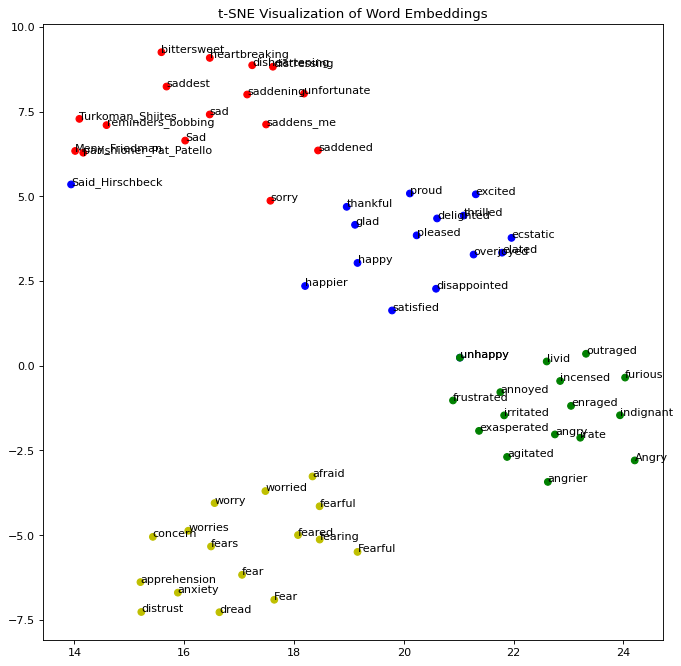

In [58]:
# Answer here
word_list = ['happy', 'angry', 'sad', 'fear']

topn = 15  # Top 15 most similar words for each target word

# Generate lists of target words and their most similar words
target_words = []
for target_word in word_list:
    similar_words = [target_word] + [word_ for word_, sim_ in w2v_google_model.most_similar(target_word, topn=topn)]
    target_words.extend(similar_words)

print('Target Words: ', target_words)

cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn

size = 200
all_word = list(w2v_google_model.index_to_key)
word_train = target_words + all_word[:size]
X_train = w2v_google_model[word_train]

# t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=69)
X_tsne = tsne.fit_transform(X_train)

# Plot the result
plt.figure(figsize=(10, 10), dpi=80)
plt.scatter(X_tsne[:len(target_words), 0], X_tsne[:len(target_words), 1], c=color)

for label, x, y in zip(target_words, X_tsne[:len(target_words), 0], X_tsne[:len(target_words), 1]):
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')

plt.title('t-SNE Visualization of Word Embeddings')
plt.show()



---